<a href="https://colab.research.google.com/github/bilalProgTech/online-data-science-ml-challenges/blob/master/Machine-Hack-Tea-Price-ML-Hackathon/ARIMA-Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://machinehack-be.s3.amazonaws.com/teastory_weekend_hackathon_edition_2_the_last_hacker_standing/Participant_Data_Tea_Story.zip
!unzip *.zip

--2021-08-16 10:33:05--  https://machinehack-be.s3.amazonaws.com/teastory_weekend_hackathon_edition_2_the_last_hacker_standing/Participant_Data_Tea_Story.zip
Resolving machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)... 52.219.62.68
Connecting to machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)|52.219.62.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24107 (24K) [application/octet-stream]
Saving to: ‘Participant_Data_Tea_Story.zip’

Participant_Data_Te 100%[===================>]  23.54K  95.8KB/s    in 0.2s    

2021-08-16 10:33:06 (95.8 KB/s) - ‘Participant_Data_Tea_Story.zip’ saved [24107/24107]

Archive:  Participant_Data_Tea_Story.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     
  inflating: submission.csv          
  inflating: __MACOSX/._submission.csv  


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 7.7 MB/s 
     |████████████████████████████████| 9.5 MB 64.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np

import pmdarima as pm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,03/01/09,99.01,79.79,N.S.,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
1,10/01/09,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84,70.550000
2,17/01/09,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,24/01/09,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,31/01/09,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923


In [ ]:
train.tail()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
539,11/05/19,152.57,165.65,134.76,146.06,149.81,134.17,122.98,115.81,98.29,81.65,109.36,94.33,89.81,70.66,118.993571
540,18/05/19,147.74,159.89,134.5,146.36,148.81,142.88,122.98,113,96.47,78.46,111.36,90.39,90.96,66.68,117.891429
541,25/05/19,149.69,155.28,134.29,142.67,147.25,149.11,122.78,111.2,94.61,77.33,109.2,92.87,87.72,66.49,117.177857
542,01/06/19,144.51,150.81,138.45,151.35,149.7,151.4,122.82,111.12,93.01,77.14,109.69,91.66,86.6,68,117.590000
543,08/06/19,151.61,156.67,146.91,153.37,147.83,145.44,120.12,112.83,92.16,76.98,105.16,91.57,84.63,67.13,118.029286


In [ ]:
test = pd.read_csv('test.csv')
test.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,15/06/19,NaN,165.87,154.08,160.82,NaN,NaN,116.45,112.82,91.82,NaN,102.30,NaN,83.07,65.34,NaN
1,22/06/19,171.35,173.12,NaN,NaN,NaN,NaN,NaN,NaN,90.68,76.34,NaN,NaN,81.34,NaN,NaN
2,29/06/19,NaN,NaN,156.14,NaN,NaN,150.39,NaN,NaN,NaN,NaN,96.84,NaN,NaN,NaN,NaN
3,06/07/19,NaN,NaN,158.04,NaN,NaN,146.68,111.24,111.47,NaN,NaN,97.87,NaN,NaN,NaN,NaN
4,13/07/19,NaN,NaN,157.55,163.85,NaN,144.87,NaN,111.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cities = ['Kolkata', 'Bangalore', 'Cochin', 'Darjeeling', 'Ernakulam', 'Siliguri', 'Guwahati']

In [ ]:
cols = train.columns[1:-1]

In [ ]:
train['WeekEnding_Date'] = pd.to_datetime(train['WeekEnding_Date'], format='%d/%m/%y')
test['WeekEnding_Date'] = pd.to_datetime(test['WeekEnding_Date'], format='%d/%m/%y')

train.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,2009-01-03,99.01,79.79,N.S.,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
1,2009-01-10,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84,70.550000
2,2009-01-17,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,2009-01-24,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,2009-01-31,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923


In [ ]:
test.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,2019-06-15,NaN,165.87,154.08,160.82,NaN,NaN,116.45,112.82,91.82,NaN,102.30,NaN,83.07,65.34,NaN
1,2019-06-22,171.35,173.12,NaN,NaN,NaN,NaN,NaN,NaN,90.68,76.34,NaN,NaN,81.34,NaN,NaN
2,2019-06-29,NaN,NaN,156.14,NaN,NaN,150.39,NaN,NaN,NaN,NaN,96.84,NaN,NaN,NaN,NaN
3,2019-07-06,NaN,NaN,158.04,NaN,NaN,146.68,111.24,111.47,NaN,NaN,97.87,NaN,NaN,NaN,NaN
4,2019-07-13,NaN,NaN,157.55,163.85,NaN,144.87,NaN,111.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
remove_words = ['NS','N.S.', 'No Sale','N.S', 'N. S.','0. 0.', 'N.0S.', 'NS00.00', '.', '', '0N0o0 0s0a0l0e0', '000\xa00', 'No sale', 'N.S.\xa0']
#pat = r'\b(?:{})\b'.format('|'.join(remove_words))
for col in cols:
    print(col)
    for remove_word in remove_words:
        train[col] = train[col].replace(remove_word, '')
        test[col] = test[col].replace(remove_word, '')
    train[col] = train[col].replace('NS85.07', '85.07')
    test[col] = test[col].replace('NS85.07', '85.07')

    train[col] = train[col].replace('', np.nan)
    test[col] = test[col].replace('', np.nan)

    train[col] = train[col].astype('float64')
    test[col] = test[col].astype('float64')

    train[col] = train[col].fillna(train[col].mean())
train.isnull().sum().sum()

Kolkata_Average_Price
Kolkata_Ref_Price
Bangalore_Average_Price
Bangalore_Ref_Price
Cochin_Average_Price
Cochin_Ref_Price
Darjeeling_Average_Price
Darjeeling_Ref_Price
Ernakulam_Average_Price
Ernakulam_Ref_Price
Siliguri_Average_Price
Siliguri_Ref_Price
Guwahati_Average_Price
Guwahati_Ref_Price


0

In [ ]:
available_dates = []
for col in cols:
    available_dates.append(test[['WeekEnding_Date', col]].dropna().reset_index(drop=True))

len(available_dates), test.shape

(14, (29, 16))

In [ ]:
train.dtypes

WeekEnding_Date             datetime64[ns]
Kolkata_Average_Price              float64
Kolkata_Ref_Price                  float64
Bangalore_Average_Price            float64
Bangalore_Ref_Price                float64
Cochin_Average_Price               float64
Cochin_Ref_Price                   float64
Darjeeling_Average_Price           float64
Darjeeling_Ref_Price               float64
Ernakulam_Average_Price            float64
Ernakulam_Ref_Price                float64
Siliguri_Average_Price             float64
Siliguri_Ref_Price                 float64
Guwahati_Average_Price             float64
Guwahati_Ref_Price                 float64
Average                            float64
dtype: object

In [ ]:
train.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,2009-01-03,99.01,79.79,129.494125,76.19,84.020000,70.07,81.66,57.83,68.940000,51.67,70.74,53.88,65.55,46.75,69.700000
1,2009-01-10,97.74,78.73,87.480000,73.97,82.720000,68.17,83.31,58.02,67.240000,52.23,70.47,53.39,67.39,46.84,70.550000
2,2009-01-17,95.95,71.01,87.660000,71.01,80.580000,67.16,82.25,57.49,69.640000,52.48,71.66,53.18,69.51,48.04,69.830000
3,2009-01-24,94.14,73.38,85.690000,65.66,120.611242,65.57,80.87,54.59,79.730737,53.43,71.12,52.07,69.14,48.50,67.846667
4,2009-01-31,91.45,70.39,129.494125,64.99,79.270000,62.09,80.76,57.06,69.650000,53.38,72.30,52.50,69.39,50.33,67.196923


In [ ]:
train[cols].describe()

,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,139.045298,133.550498,129.494125,123.785091,120.611242,115.338081,100.848008,95.541759,79.730737,76.845693,84.875258,81.008046,71.558280,69.369346
std,21.616843,24.088273,21.138620,23.336799,17.715524,19.392887,16.089245,17.487759,14.503662,14.155883,15.300350,14.788620,14.627282,14.035934
min,67.640000,64.790000,66.400000,55.650000,71.290000,57.020000,62.290000,0.000000,0.000000,50.530000,11.600000,52.070000,0.000000,43.110000
25%,125.807500,120.315000,115.742500,109.577500,109.377500,104.347500,87.132500,82.892500,69.622500,65.600000,72.627500,70.502500,59.587500,57.772500
50%,139.980000,133.550498,129.494125,123.785091,120.690000,115.338081,100.848008,95.541759,78.295000,75.495000,84.570000,80.695000,69.470000,67.570000
75%,155.042500,152.122500,144.550000,141.190000,131.602500,128.395000,111.930000,109.200000,92.130000,86.492500,96.522500,92.127500,84.102500,80.175000
max,189.380000,189.380000,177.290000,177.330000,165.070000,165.070000,137.240000,137.250000,110.750000,110.750000,117.470000,117.470000,101.730000,101.730000


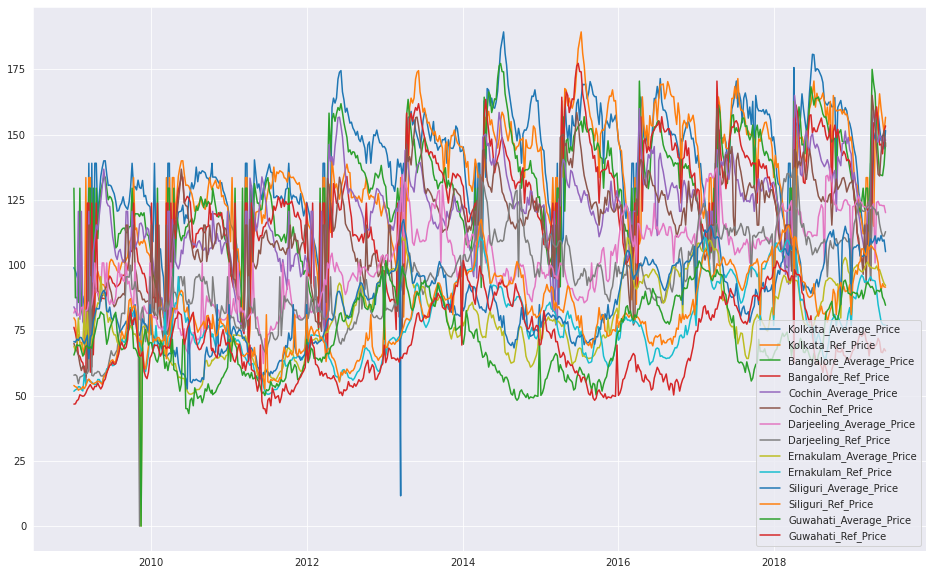

In [ ]:
tp_df = train[cols].copy()
tp_df.index = train['WeekEnding_Date']

plt.figure(figsize=(16, 10))
for col in cols:
    plt.plot(tp_df[col], label=col)
plt.legend()
plt.show()

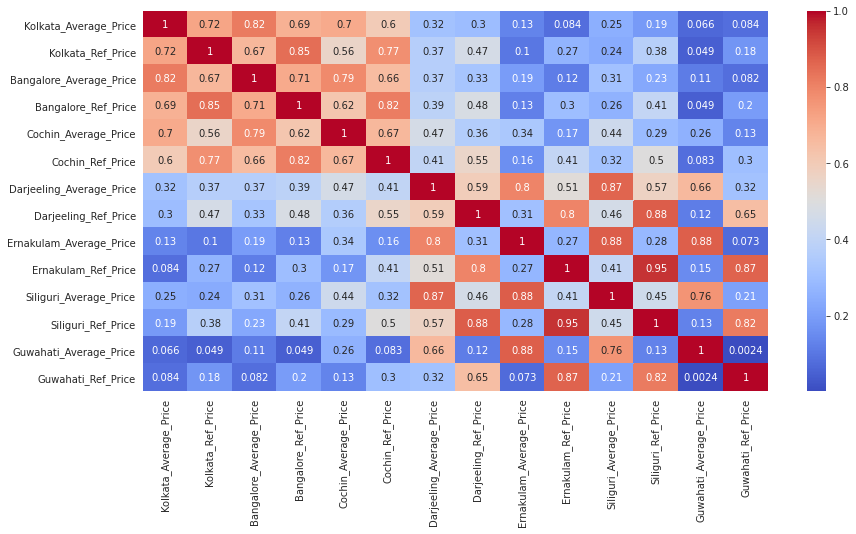

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.heatmap(tp_df.corr(), annot=True, cmap="coolwarm")
plt.show()

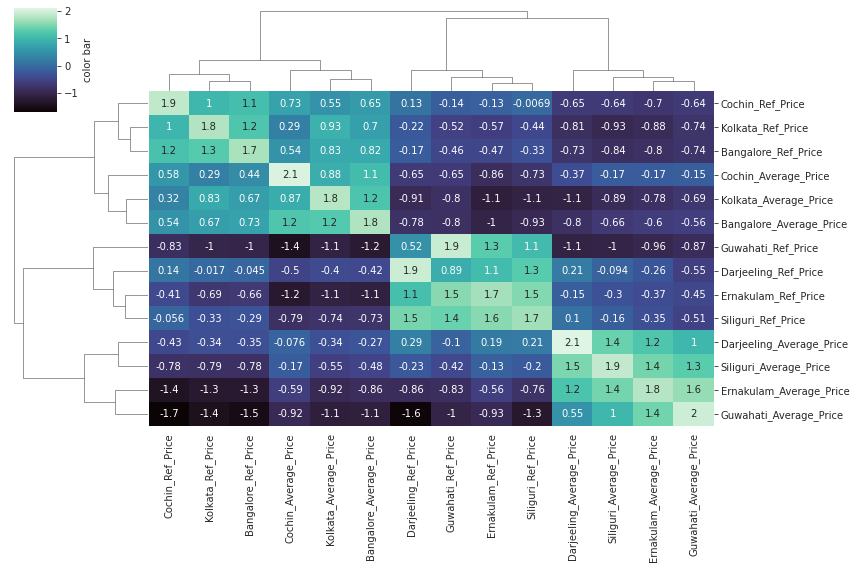

In [ ]:
g = sns.clustermap(tp_df.corr(), figsize=(12,8), z_score=1, 
                   cbar_kws={"label": "color bar"}, annot=True, 
                   cmap="mako")
plt.show()

In [ ]:
col = 'Kolkata_Ref_Price'
df_train = pd.DataFrame({col: train[col].values}, index=train.WeekEnding_Date)
df_test = pd.DataFrame(index=test.WeekEnding_Date, columns=[col])

print(df_train.shape)
print(df_test.shape)

(544, 1)
(29, 1)


In [ ]:
df_train.head()

,Kolkata_Ref_Price
WeekEnding_Date,
2009-01-03,79.79
2009-01-10,78.73
2009-01-17,71.01
2009-01-24,73.38
2009-01-31,70.39


Best ARIMA Model order for Kolkata_Ref_Price: (2, 1, 0)


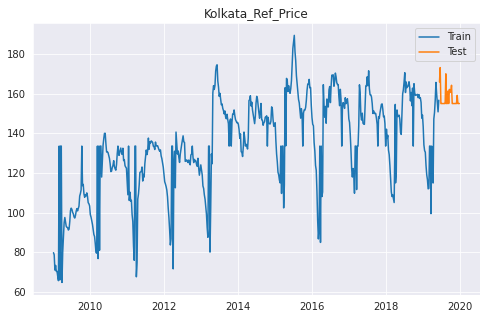

In [ ]:
model = pm.auto_arima(df_train[col])
print("Best ARIMA Model order for "+col+": "+str(model.order))
pred_next = np.round(model.predict(df_test.shape[0]))

df_test[col] = pred_next
df_test = df_test.reset_index()
df_test = pd.merge(df_test, available_dates[1], on='WeekEnding_Date', how='outer')
null_index = df_test[df_test[col+'_y'].isnull()].index
df_test.loc[null_index, col+'_y'] = df_test.loc[null_index, col+'_x']
df_test = pd.DataFrame({col: df_test[col+'_y'].values}, index=test.WeekEnding_Date)

plt.figure(figsize=(8, 5))
plt.plot(df_train[col], label='Train')
plt.plot(df_test[col], label='Test')
plt.legend()
plt.title(col)
plt.show()

In [ ]:
test_new = test.copy()
for i, col in enumerate(cols):
    print(col)
    df_train = pd.DataFrame({col: train[col].values}, index=train.WeekEnding_Date)
    df_test = pd.DataFrame(index=test.WeekEnding_Date, columns=[col])
    model = pm.auto_arima(df_train[col])
    print("Best ARIMA Model order for "+col+": "+str(model.order))
    pred_next = np.round(model.predict(df_test.shape[0]))

    df_test[col] = pred_next
    df_test = df_test.reset_index()
    df_test = pd.merge(df_test, available_dates[i], on='WeekEnding_Date', how='outer')
    null_index = df_test[df_test[col+'_y'].isnull()].index
    df_test.loc[null_index, col+'_y'] = df_test.loc[null_index, col+'_x']
    test_new[col] = df_test[col+'_y'].values

test_new.head()

Kolkata_Average_Price
Best ARIMA Model order for Kolkata_Average_Price: (2, 1, 0)
Kolkata_Ref_Price
Best ARIMA Model order for Kolkata_Ref_Price: (2, 1, 0)
Bangalore_Average_Price
Best ARIMA Model order for Bangalore_Average_Price: (3, 1, 1)
Bangalore_Ref_Price
Best ARIMA Model order for Bangalore_Ref_Price: (2, 1, 0)
Cochin_Average_Price
Best ARIMA Model order for Cochin_Average_Price: (3, 1, 2)
Cochin_Ref_Price
Best ARIMA Model order for Cochin_Ref_Price: (1, 1, 2)
Darjeeling_Average_Price
Best ARIMA Model order for Darjeeling_Average_Price: (0, 1, 1)
Darjeeling_Ref_Price
Best ARIMA Model order for Darjeeling_Ref_Price: (0, 1, 1)
Ernakulam_Average_Price
Best ARIMA Model order for Ernakulam_Average_Price: (1, 1, 1)
Ernakulam_Ref_Price
Best ARIMA Model order for Ernakulam_Ref_Price: (3, 1, 2)
Siliguri_Average_Price
Best ARIMA Model order for Siliguri_Average_Price: (0, 1, 1)
Siliguri_Ref_Price
Best ARIMA Model order for Siliguri_Ref_Price: (0, 1, 1)
Guwahati_Average_Price
Best ARIMA Mo

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,2019-06-15,150.00,165.87,154.08,160.82,145.0,145.00,116.45,112.82,91.82,77.00,102.30,92.0,83.07,65.34,NaN
1,2019-06-22,171.35,173.12,142.00,151.00,145.0,147.00,121.00,113.00,90.68,76.34,108.00,92.0,81.34,67.00,NaN
2,2019-06-29,150.00,155.00,156.14,151.00,143.0,150.39,121.00,113.00,93.00,78.00,96.84,92.0,86.00,67.00,NaN
3,2019-07-06,149.00,155.00,158.04,151.00,142.0,146.68,111.24,111.47,93.00,77.00,97.87,92.0,86.00,67.00,NaN
4,2019-07-13,149.00,155.00,157.55,163.85,141.0,144.87,121.00,111.44,93.00,77.00,108.00,92.0,86.00,67.00,NaN


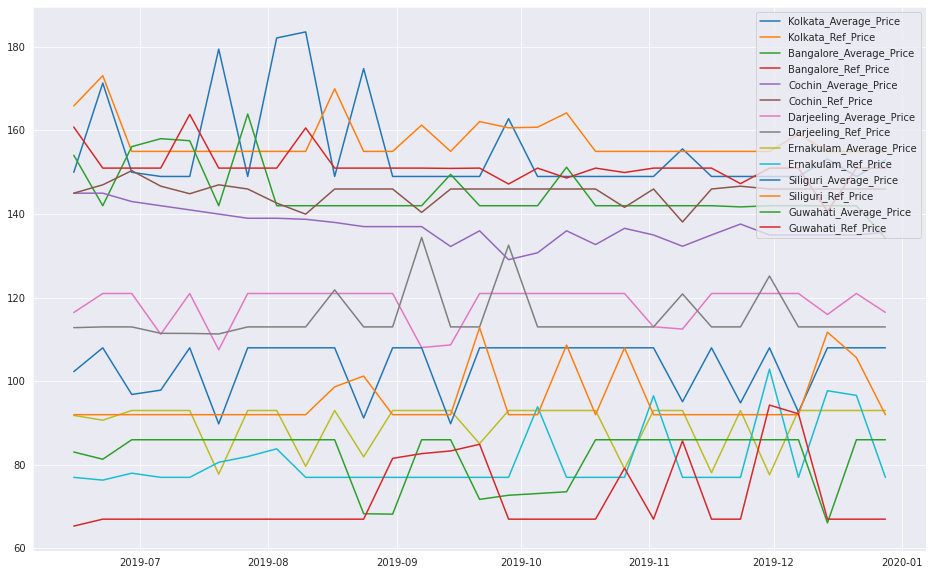

In [ ]:
tp_test_df = test_new[cols].copy()
tp_test_df.index = test_new['WeekEnding_Date']

plt.figure(figsize=(16, 10))
for col in cols:
    plt.plot(tp_test_df[col], label=col)
plt.legend()
plt.show()

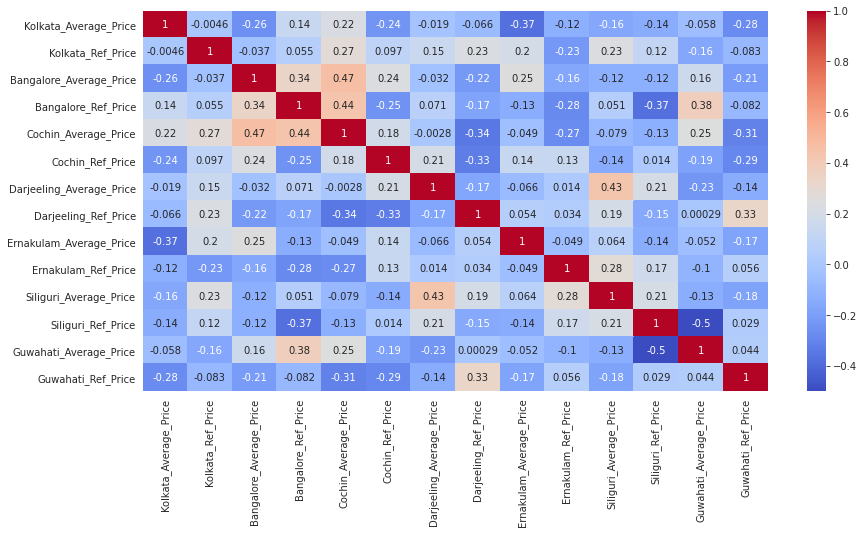

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.heatmap(tp_test_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
submission = pd.DataFrame()
submission['Average'] = test_new[[col for col in cols if 'Average' in col]].mean(axis=1)
submission.to_csv('Avg-ARIMA.csv', index=False)

In [ ]:
submission.head()

,Average
0,120.388571
1,122.767143
2,120.854286
3,119.592857
4,122.221429
